# Money Flow Index (MFI)

Money Flow Index (MFI) is a technical oscillator that uses price and volume for identifying overbought or oversold conditions in an asset. It can also be used to spot divergences which warn of a trend change in price. The oscillator moves between 0 and 100.

https://www.investopedia.com/terms/m/mfi.asp

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'icicibank.ns'
start = '2020-01-01'
end = '2023-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01 00:00:00+05:30,539.900024,542.500000,535.700012,536.750000,531.990540,7642793
2020-01-02 00:00:00+05:30,536.000000,541.900024,535.849976,540.599976,535.806335,10264223
2020-01-03 00:00:00+05:30,538.000000,540.799988,536.250000,538.849976,534.071838,9594690
2020-01-06 00:00:00+05:30,537.250000,537.250000,523.799988,525.700012,521.038513,12534334
2020-01-07 00:00:00+05:30,531.299988,535.599976,521.650024,522.900024,518.263306,16101835


In [3]:
import talib as ta

In [4]:
df['MFI'] = ta.MFI(df['High'], df['Low'],df['Adj Close'], df['Volume'], timeperiod=14)

In [5]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,MFI
Date,,,,,,,
2022-12-26 00:00:00+05:30,881.099976,897.000000,875.250000,893.200012,893.200012,6943159,43.961834
2022-12-27 00:00:00+05:30,897.700012,902.750000,888.200012,900.650024,900.650024,4994381,39.087298
2022-12-28 00:00:00+05:30,896.000000,903.950012,895.799988,898.950012,898.950012,8980300,38.367227
2022-12-29 00:00:00+05:30,897.900024,923.349976,889.349976,908.049988,908.049988,11994220,39.416984
2022-12-30 00:00:00+05:30,908.500000,908.500000,888.549988,890.849976,890.849976,9688527,39.152258


In [6]:
df['Positive'] = df['MFI'] > 0

Text(0.5, 0, 'Date')

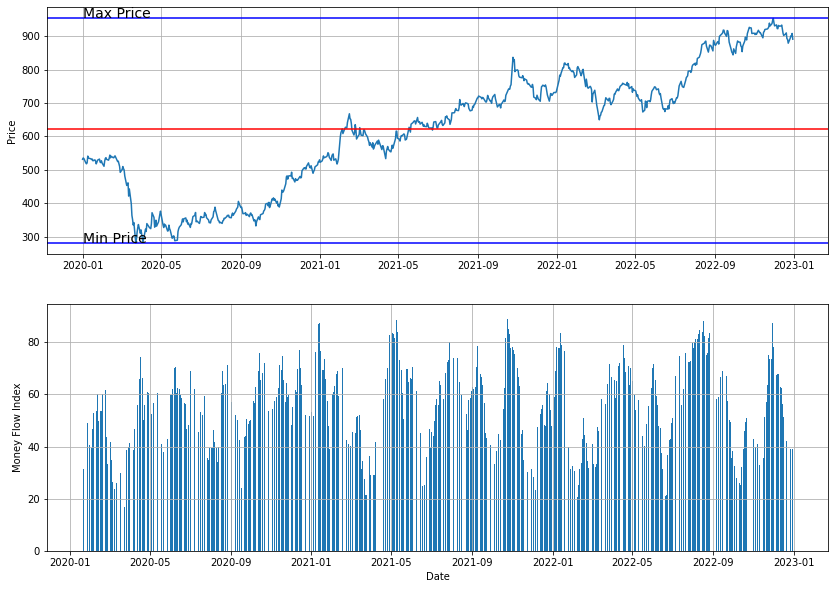

In [7]:
df['MFI'] = ta.MFI(df['High'], df['Low'],df['Adj Close'], df['Volume'], timeperiod=14)# Line Chart
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df.index, df['Adj Close'])
ax1.axhline(y=df['Adj Close'].mean(),color='r')
ax1.axhline(y=df['Adj Close'].max(),color='b')
ax1.axhline(y=df['Adj Close'].min(),color='b')
ax1.text(s='Max Price', x=df['Adj Close'].index[0], y=df['Adj Close'].max(), fontsize=14)
ax1.text(s='Min Price', x=df['Adj Close'].index[0], y=df['Adj Close'].min(), fontsize=14)
ax1.set_ylabel('Price')
ax1.grid()

ax2 = plt.subplot(2, 1, 2)
# ax2.bar(df.index, df['MFI'], color=df.Positive.map({True: 'g', False: 'r'}))
ax2.bar(df.index, df['MFI'])
ax2.grid()
ax2.set_ylabel('Money Flow Index')
ax2.set_xlabel('Date')

## Candlestick with MFI

In [8]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['MFI'] = ta.MFI(dfc['High'], dfc['Low'],dfc['Adj Close'], dfc['Volume'], timeperiod=14)
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,MFI,Positive,VolumePositive
0,18281.770833,532.950012,540.250000,530.200012,531.049988,526.341064,13477994,37.730056,True,False
1,18282.770833,531.500000,534.950012,520.750000,522.849976,518.213745,17527408,31.224779,True,False
2,18283.770833,521.400024,530.250000,517.049988,527.700012,523.020752,17061293,30.151968,True,True
3,18284.770833,529.250000,537.400024,527.000000,533.849976,529.116211,17851868,37.788683,True,False
4,18287.770833,538.500000,545.000000,531.500000,537.250000,532.486084,38149166,50.545168,True,False


Text(0.5, 0, 'Date')

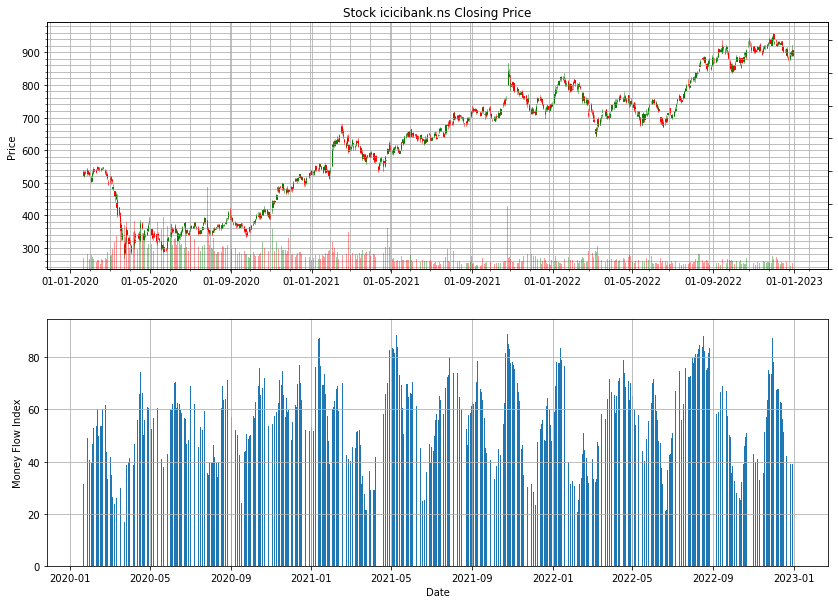

In [10]:
from mpl_finance import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.bar(df.index, df['MFI'])
ax2.grid()
ax2.set_ylabel('Money Flow Index')
ax2.set_xlabel('Date')